<h1 align="center" style="color: lightblue;">TAREA UNIDAD 03-B</h1>

**Nombre:** Camila Caicedo

**Curso:** GR1CC

**Fecha de entrega:** 05/11/2025

**Enlace al repositorio:** https://github.com/dxcam/TalleresMetodosNumericos.git

<h3 align="center" style="color: lightblue;">SERIE DE TAYLOR Y POLINOMIOS DE LAGRANGE</h3>

## Conjunto de ejercicios

**Determine el orden de la mejor aproximación para las siguientes funciones, usando la Serie de Taylor y el Polinomio de Lagrange:**

* **Escriba las fórmulas de los diferentes polinomios**
* **Grafique las diferentes aproximaciones**

**1.** $\frac{1}{25∗x^2+1}, x_0=0$

*Serie de Taylor*

- $f(x) = \frac{1}{25x^2+1} $
- $f'(x) = -\frac{50x}{(25x^2+1)^2} $
- $f''(x) = \frac{50(1-75x^2)}{(25x^2+1)^3} $
- $f'''(x) = \frac{1500x(-25x^2+1)}{(25x^2+1)^4} $
- $f^4(x) = \frac{1500(3125x^4-250x^2+1)}{(25x^2+1)^5} $

$$P_n(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + ... + \frac{f^{n}(x_0)}{n!}(x-x_0)^n = \sum_{k=0}^{n}\frac{f^{(k)}(x_0)}{k!}(x-x_0)^k$$

$$P_4(x) = \frac{1}{25(0)^2+1} - \frac{50(0)}{(25(0)^2+1)^2}(x-0) + \frac{\frac{50(1-75(0)^2)}{(25(0)^2+1)^3}}{2!}(x-0)^2 + \frac{\frac{1500x(-25(0)^2+1)}{(25(0)^2+1)^4}}{3!}(x-0)^3 + \frac{\frac{1500(3125(0)^4-250(0)^2+1)}{(25(0)^2+1)^5}}{4!}(x-0)^4 $$

$$P_4(x) = 1 - 25x^2 + 625x^4 $$

Como la función es par, en la expansión solo aparecen términos pares y el orden de la mejor aproximación se toma como orden 4.

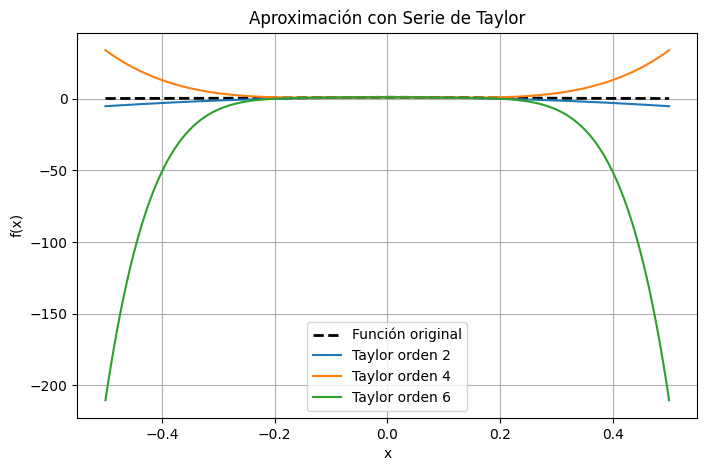

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1 / (25 * x**2 + 1)

def taylor(x, order):
    result = 0
    for k in range(order//2 + 1):  # Solo términos pares
        coef = (-1)**k * (25**k)
        result += coef * x**(2*k)
    return result

# Intervalo para graficar
x_vals = np.linspace(-0.5, 0.5, 200)
f_vals = f(x_vals)

# Aproximaciones Taylor
taylor2 = [taylor(x, 2) for x in x_vals]
taylor4 = [taylor(x, 4) for x in x_vals]
taylor6 = [taylor(x, 6) for x in x_vals]

plt.figure(figsize=(8,5))
plt.plot(x_vals, f_vals, 'k', label='Función original', linewidth=2, linestyle='--') 
plt.plot(x_vals, taylor2, label='Taylor orden 2')
plt.plot(x_vals, taylor4, label='Taylor orden 4')
plt.plot(x_vals, taylor6, label='Taylor orden 6')
plt.title('Aproximación con Serie de Taylor')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

*Polinomio de Lagrange*

Se tomaron los siguientes puntos (-0.2, 0.5), (0,1), (0.2, 0.5). Entonces, el polinomio es de orden n = 2.

$$L_0(x) = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} = \frac{(x - 0)(x - 0.2)}{(-0.2 - 0)(-0.2 - 0.2)} = \frac{x(x-0.2)}{(-0.2)(-0.4)} = \frac{x(x-0.2)}{0.08} $$
$$L_1(x) = \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)} = \frac{(x + 0.2)(x - 0.2)}{(0 + 0.2)(0 - 0.2)} = \frac{(x+0.2)(x-0.2)}{-0.04} $$
$$L_2(x) = \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)} = \frac{(x + 0.2)(x - 0)}{(0.2 + 0.2)(0.2 - 0)} =  \frac{(x+0.2)x}{0.08} $$

$$P_2(x) = y_0 L_0(x) + y_1 L_1(x) + y_2 L_2(x)$$
$$P_2(x) = 0.5(\frac{x(x-0.2)}{0.08}) + 1(\frac{(x+0.2)(x-0.2)}{-0.04}) + 0.5(\frac{(x+0.2)x}{0.08})$$

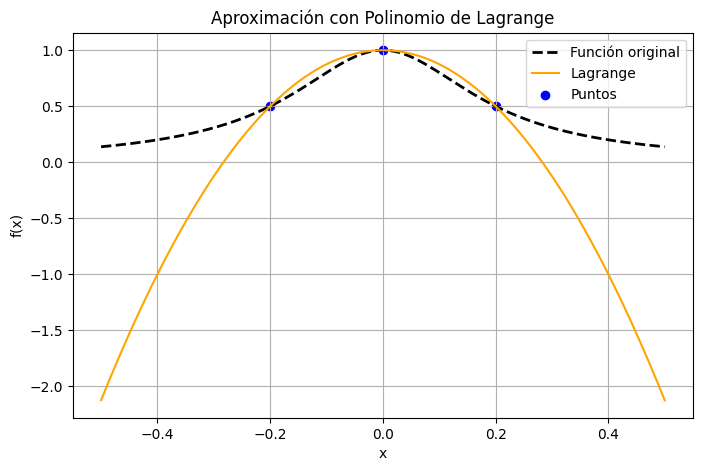

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1 / (25 * x**2 + 1)

x_nodes = np.array([-0.2, 0.0, 0.2])
y_nodes = f(x_nodes)

def lagrange(x, x_nodes, y_nodes):
    n = len(x_nodes)
    total = 0
    for i in range(n):
        term = y_nodes[i]
        for j in range(n):
            if i != j:
                term *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        total += term
    return total

# Intervalo para graficar
x_vals = np.linspace(-0.5, 0.5, 200)
f_vals = f(x_vals)
lagrange_vals = [lagrange(x, x_nodes, y_nodes) for x in x_vals]

plt.figure(figsize=(8,5))
plt.plot(x_vals, f_vals, 'k', label='Función original', linewidth=2, linestyle='--')
plt.plot(x_vals, lagrange_vals, label='Lagrange', linestyle= '-', color='orange')
plt.scatter(x_nodes, y_nodes, color='blue', label='Puntos')
plt.title('Aproximación con Polinomio de Lagrange')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

**2.** $arctanx,x_0=1$

*Serie de Taylor*

- $f(x) = arctan(x) $
- $f'(x) = \frac{1}{x^2 + 1} $
- $f''(x) = -\frac{2x}{(x^2 + 1)^2} $
- $f'''(x) = -\frac{2(-3x^2+1)}{(x^2 + 1)^3} $
- $f^4(x) = \frac{24x(-x^2+1)}{(x^2 + 1)^4} $

$$P_n(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + ... + \frac{f^{n}(x_0)}{n!}(x-x_0)^n = \sum_{k=0}^{n}\frac{f^{(k)}(x_0)}{k!}(x-x_0)^k$$

$$P_4(x) = arctan(1) + \frac{1}{(1)^2+1} (x-1) + \frac{-\frac{2(1)}{(1^2+1)^2} }{2!}(x-1)^2 - \frac{\frac{2(-3x^2+1)}{(1^2+1)^3}}{3!}(x-1)^3 + \frac{\frac{24(1)(-1^2+1)}{(1^2+1)^4}}{4!}(x-1)^4$$

$$P_4(x) = \frac{\pi}{4} + \frac{1}{2}(x-1) - \frac{1}{4}(x-1)^2 + \frac{1}{12}(x-1)^3  $$

En este caso se realiza la aproximación para orden 3.

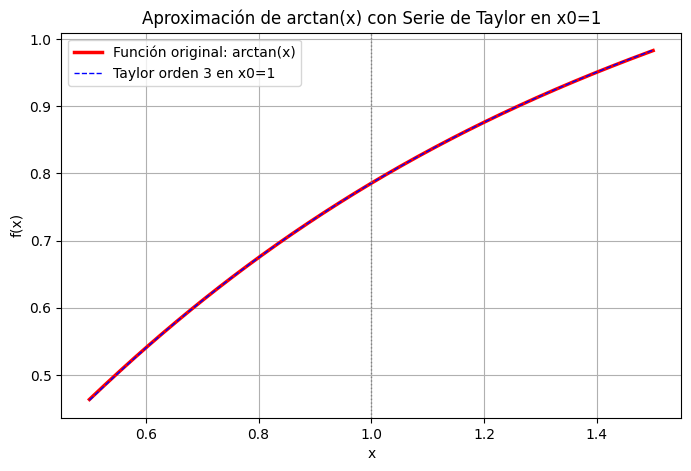

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Función original
def f(x):
    return np.arctan(x)

# Centro de expansión
x0 = 1.0

# Derivadas en x0
f_x0  = np.arctan(x0)                  
f1_x0 = 1.0 / (1.0 + x0**2)            
f2_x0 = -2.0 * x0 / (1.0 + x0**2)**2   
f3_x0 = (6.0 * x0**2 - 2.0) / (1.0 + x0**2)**3  

def taylor3(x):
    dx = x - x0
    return (f_x0
            + f1_x0 * dx
            + (f2_x0 / 2.0) * dx**2
            + (f3_x0 / 6.0) * dx**3)

x_vals = np.linspace(0.5, 1.5, 400)
f_vals = f(x_vals)
t3_vals = taylor3(x_vals)

# Gráfica
plt.figure(figsize=(8,5))
plt.plot(x_vals, f_vals, lw=2.5, label='Función original: arctan(x)', color= 'red')
plt.plot(x_vals, t3_vals, lw=1, label='Taylor orden 3 en x0=1', linestyle='--', color='blue')
plt.axvline(x0, color='gray', ls=':', lw=1)
plt.title('Aproximación de arctan(x) con Serie de Taylor en x0=1')
plt.xlabel('x'); plt.ylabel('f(x)')
plt.legend(); plt.grid(True)
plt.show()

*Polinomio de Lagrange*

Para este caso se tomaron como puntos: (0.8, 0.6747), (1, 0.7854), (1.2, 0.8761).

$$L_0(x) = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} = \frac{(x - 1)(x - 1.2)}{(0.8 - 1)(0.8 - 1.2)} = \frac{(x-1)(x-1.2)}{0.08} $$
$$L_1(x) = \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)} = \frac{(x - 0.8)(x - 1.2)}{(1 - 0.8)(1 - 1.2)} = \frac{(x-0.8)(x-1.2)}{-0.04} $$
$$L_2(x) = \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)} = \frac{(x + 0.8)(x - 1)}{(1.2 - 0.8)(1.2 - 1)} =  \frac{(x-0.8)(x-1)}{0.08} $$

$$P_2(x) = y_0 L_0(x) + y_1 L_1(x) + y_2 L_2(x)$$
$$P_2(x) = 0.6747(\frac{(x-1)(x-1.2)}{0.08}) + 0.7854(\frac{(x-0.8)(x-1.2)}{-0.04}) + 0.8761(\frac{(x-0.8)(x-1)}{0.08})$$

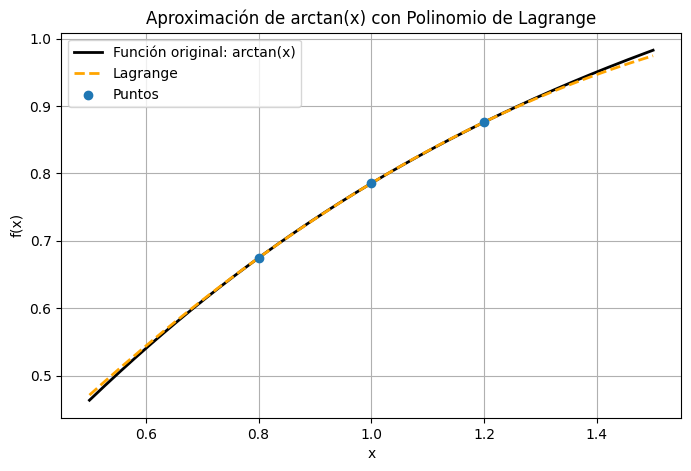

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Función original
def f(x):
    return np.arctan(x)

x_nodes = np.array([0.8, 1.0, 1.2])
y_nodes = f(x_nodes)

# Bases de Lagrange L_i(x)
def lagrange(x, x_nodes, y_nodes):
    n = len(x_nodes)
    total = 0.0
    for i in range(n):
        # Construye L_i(x)
        Li = 1.0
        for j in range(n):
            if i != j:
                Li *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        total += y_nodes[i] * Li
    return total

x_vals = np.linspace(0.5, 1.5, 400)
f_vals = f(x_vals)
P_vals = np.array([lagrange(x, x_nodes, y_nodes) for x in x_vals])

plt.figure(figsize=(8,5))
plt.plot(x_vals, f_vals, lw=2, label='Función original: arctan(x)', color= 'black')
plt.plot(x_vals, P_vals, lw=2, label='Lagrange', color='orange', linestyle='--')
plt.scatter(x_nodes, y_nodes, color='C0', zorder=3, label='Puntos')
plt.title('Aproximación de arctan(x) con Polinomio de Lagrange')
plt.xlabel('x'); plt.ylabel('f(x)')
plt.legend(); plt.grid(True)
plt.show()